<a href="https://colab.research.google.com/github/pratikshakirolkar/Electricity-Consumption-Project/blob/main/Time_Series_Analysis%2C_Visualization_%26_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping


read dataset

In [6]:
df=pd.read_csv('/content/household_power_consumption.csv')
print('Number of rows and columns:', df.shape)

Number of rows and columns: (1048575, 9)


top 5 records

In [7]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0000
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0000


Datatype

In [8]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna(subset=['Global_active_power'])
df['date_time']=pd.to_datetime(df['date_time']) 

In [10]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.2160,0.418,234.84,18.4,0,1,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.3600,0.436,233.63,23,0,1,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.3740,0.498,233.29,23,0,2,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.3880,0.502,233.74,23,0,1,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.6660,0.528,235.68,15.8,0,1,17.0000,2006-12-16 17:28:00


In [11]:
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)

In [12]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,quarter,month,day
0,16/12/2006,17:24:00,4.2160,0.418,234.84,18.4,0,1,17.0000,2006-12-16 17:24:00,2006,4,12,16
1,16/12/2006,17:25:00,5.3600,0.436,233.63,23,0,1,16.0000,2006-12-16 17:25:00,2006,4,12,16
2,16/12/2006,17:26:00,5.3740,0.498,233.29,23,0,2,17.0000,2006-12-16 17:26:00,2006,4,12,16
3,16/12/2006,17:27:00,5.3880,0.502,233.74,23,0,1,17.0000,2006-12-16 17:27:00,2006,4,12,16
4,16/12/2006,17:28:00,3.6660,0.528,235.68,15.8,0,1,17.0000,2006-12-16 17:28:00,2006,4,12,16


In [13]:
df=df.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)

In [14]:
df.head()

,date_time,Global_active_power,year,quarter,month,day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16


In [15]:
df["weekday"]=df.apply(lambda row: row["date_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)

In [16]:
df.head()

,date_time,Global_active_power,year,quarter,month,day,weekday
0,2006-12-16 17:24:00,4.2160,2006,4,12,16,0
1,2006-12-16 17:25:00,5.3600,2006,4,12,16,0
2,2006-12-16 17:26:00,5.3740,2006,4,12,16,0
3,2006-12-16 17:27:00,5.3880,2006,4,12,16,0
4,2006-12-16 17:28:00,3.6660,2006,4,12,16,0


In [17]:
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.date_time.min())
print('The time series ends on: ', df.date_time.max())

Number of rows and columns after removing missing values: (1044506, 7)
The time series starts from:  2006-12-16 17:24:00
The time series ends on:  2008-12-13 21:38:00


In [18]:
#Gaussian distribution
stat, p = stats.normaltest(df.Global_active_power)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=359434.838, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 3.8540487656341007
Skewness of normal distribution: 1.7713830466129377


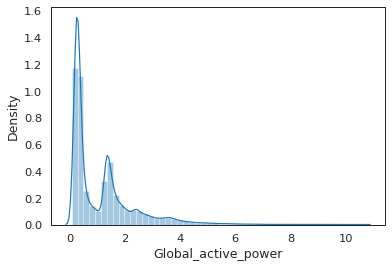

In [19]:
sns.distplot(df.Global_active_power);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Global_active_power)))